# 外包框的旋转增益问题

在目标检测中对图像进行缩放, 裁剪, 镜像是常见的增益方式, 缺少有旋转增益. 其主要原因是矩形框旋转之后没办法确定的问题. 这里提出一种用内接椭圆确定的方式.

In [26]:
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(0, '..') # add xvision
from xvision.utils.draw import *
from xvision.transforms.boxes import *
from xvision.transforms import matrix2d
from xvision.transforms.warp import warp_affine


首先我们创建一个矩形和其对应的内切椭圆.

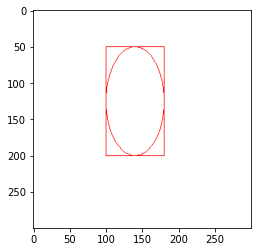

In [27]:
box = np.array([100, 50, 180, 200], dtype=np.float32)
image = np.ones((300, 300, 3), np.uint8) * 255

cbox = bbox2cbox(box)
cx, cy, w, h = cbox.astype(np.int32)

draw_bbox(image, box, color=(0, 0, 255))
# draw the ellipse
cv2.ellipse(image, (cx, cy), (w//2, h//2),0, 0, 360, color=(0, 0, 255))
plt.imshow(image[:,:,::-1])

我们认为, 旋转之后新的矩形仍然应当与旋转之后的椭圆相切. 但是需要注意一点是, 如果你进行多次变换, 将矩形转变成能够表征旋转的方式. 我们建议直接用齐次矩阵的方式表示. 下面的代码演示了, 将bbox旋转两次和用abox旋转两次之后结果的差异. 由图可以看出, bbox 旋转两次之后, 最后的矩形(蓝色的)与最初的椭圆已经不想切. 而abox转化过来的矩形仍然与椭圆相切!

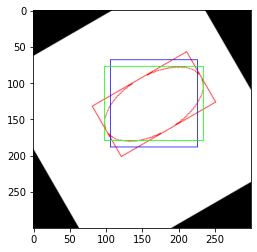

In [28]:
matrix1 = matrix2d.center_rotate_scale_cw((150, 150), 45, 1)
matrix2 = matrix2d.center_rotate_scale_cw((150, 150), 15, 1)
matrix = matrix2 @ matrix1
abox = bbox2abox(box)
box1 = bbox_affine(box, matrix1)
box2 = bbox_affine(box1, matrix2)
abox2 = matrix2 @ matrix1 @ abox

image = warp_affine(image, matrix, (300, 300))
draw_bbox(image, box2, color=(255,0, 0))

box2_from_abox = abox2bbox(abox2)
draw_bbox(image, box2_from_abox, color=(0, 255, 0))
plt.imshow(image[:,:,::-1])